Data Preparation


1. Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

2. Load Dataset

In [35]:
# Load the dataset
df = pd.read_csv('depression_anxiety_data.csv')
# Display first 5 rows
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


3. Data Cleaning

In [36]:
df = df.drop(['id', 'school_year', 'age'], axis=1)  # Replace with actual column names
# Display normalized data
df.head()

,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [37]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64


In [38]:
# Handle missing values
# Fill numerical columns with median
numerical_cols = ['bmi', 'phq_score', 'gad_score', 'epworth_score']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           0
sleepiness              8
dtype: int64


C:\Users\anike\AppData\Local\Temp\ipykernel_19052\2748949482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_19052\2748949482.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [39]:
# Handle missing values
# Fill categorical columns with mode
categorical_cols = ['gender', 'who_bmi', 'depression_severity', 'depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'anxiety_severity', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64


C:\Users\anike\AppData\Local\Temp\ipykernel_19052\3158255883.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\anike\AppData\Local\Temp\ipykernel_19052\3158255883.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inpl

4. Normalization

In [40]:
# Normalize numerical columns (scale to 0-1)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display normalized data
df.head()

,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,male,0.611030,Class I Obesity,0.375000,Mild,False,False,False,False,0.523810,Moderate,True,False,False,0.21875,False
1,male,0.363709,Normal,0.333333,Mild,False,False,False,False,0.238095,Mild,False,False,False,0.43750,True
2,male,0.460150,Overweight,0.333333,Mild,False,False,False,False,0.285714,Mild,False,False,False,0.18750,False
3,female,0.435151,Normal,0.791667,Moderately severe,True,True,False,False,0.714286,Severe,True,False,False,0.34375,True
4,male,0.469588,Overweight,0.250000,Mild,False,False,False,False,0.666667,Moderate,True,False,False,0.09375,False


5. Exploratory Data Analysis (EDA)

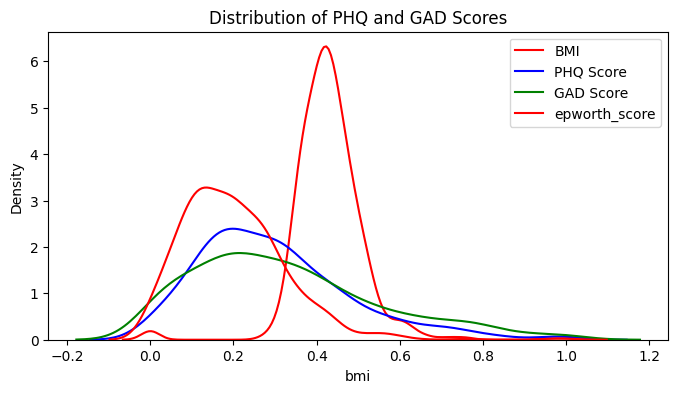

<Figure size 700x400 with 0 Axes>

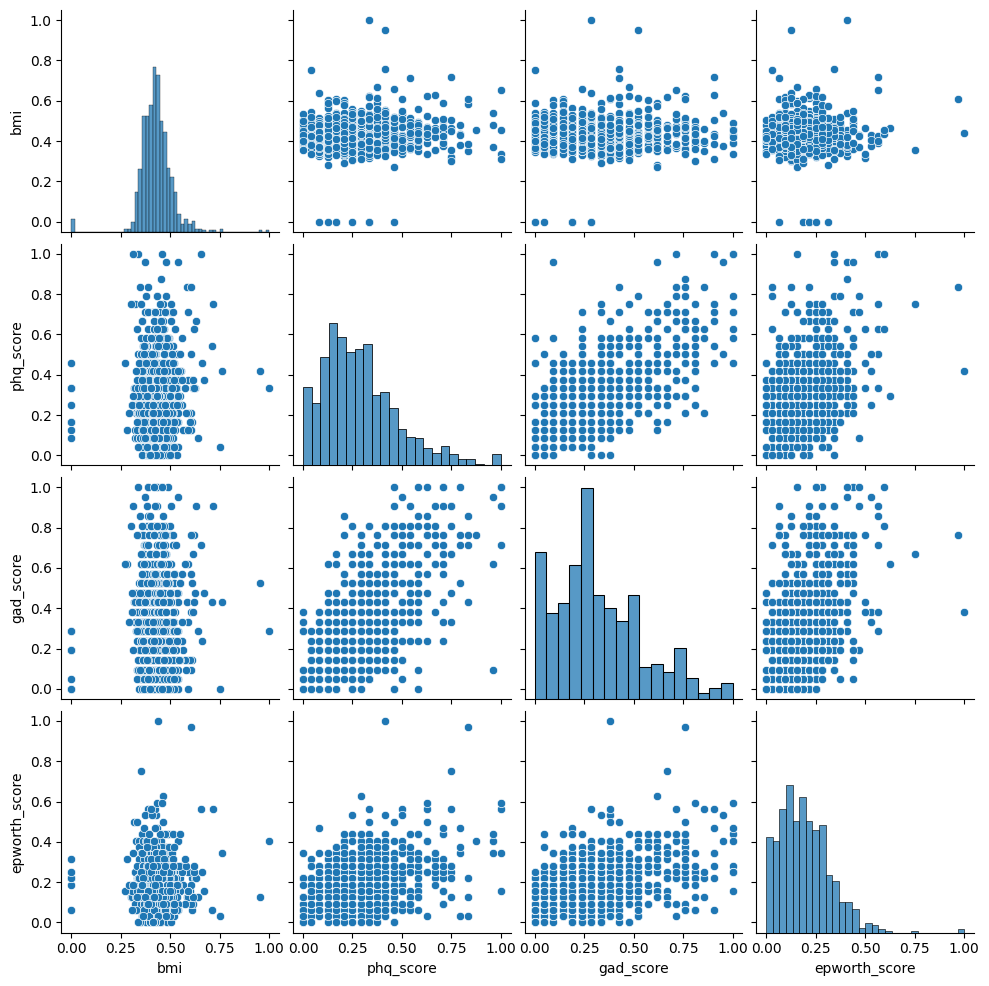

In [41]:
# Summary statistics
# print("Summary Statistics:\n", df.describe())

# Distribution of key features
plt.figure(figsize=(8, 4))
sns.kdeplot(df['bmi'], color='red', label='BMI')
sns.kdeplot(df['phq_score'], color='blue', label='PHQ Score')
sns.kdeplot(df['gad_score'], color='green', label='GAD Score')
sns.kdeplot(df['epworth_score'], color='red', label='epworth_score')
plt.title('Distribution of PHQ and GAD Scores')
plt.legend()
plt.show()


# Pairplot for key features
plt.figure(figsize=(7, 4))
sns.pairplot(df[['bmi', 'phq_score', 'gad_score', 'epworth_score']])
plt.show()
# df.head()


6. Encoding

In [42]:
# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()
# df.describe()

,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,0.611030,0,0.375000,0,0,0,0,0,0.523810,2,1,0,0,0.21875,0
1,1,0.363709,3,0.333333,0,0,0,0,0,0.238095,1,0,0,0,0.43750,1
2,1,0.460150,5,0.333333,0,0,0,0,0,0.285714,1,0,0,0,0.18750,0
3,0,0.435151,3,0.791667,2,1,1,0,0,0.714286,4,1,0,0,0.34375,1
4,1,0.469588,5,0.250000,0,0,0,0,0,0.666667,2,1,0,0,0.09375,0


7 Feature Engineering

In [43]:
# Function to predict mental health conditions
def predict_conditions(row):
    predictions = {}

    # 1️⃣ Depression Spectrum Conditions
    predictions['Major Depressive Disorder (MDD)'] = (
        (row['phq_score'] >= 0.34) and  # PHQ-9 ≥ 10 = Moderate+ Depression
        (row['depression_severity'] >= 1) and  # Moderate+ severity
        (row['suicidal'] == 1) and  # Suicidal thoughts
        (row['depressiveness'] == 1)  # Depressiveness
    )

    predictions['Dysthymia'] = (
        (0.34 <= row['phq_score'] <= 1) and  # PHQ-9 5-9 = Mild Depression
        (row['depression_severity'] >= 1) and  # Mild+ severity
        (row['depressiveness'] == 1) and  # Depressiveness
        (row['gad_score'] >= 0.34) and  # Chronic anxiety (GAD-7 ≥ 5)
        (row['epworth_score'] >= 0.26)  # Sleepiness (Epworth ≥ 8)
    )

    predictions['Seasonal Affective Disorder (SAD)'] = (
        (row['phq_score'] >= 0.34) and  # PHQ-9 ≥ 10 = Moderate+ Depression
        (row['depression_severity'] >= 1) and  # Moderate+ severity
        (row['epworth_score'] >= 0.26) and  # Sleepiness (Epworth ≥ 10)
        (row['bmi'] >= 0.41)  # Obesity-linked (BMI ≥ 25)
    )

    # 2️⃣ Anxiety Spectrum Conditions
    predictions['Generalized Anxiety Disorder (GAD)'] = (
        (row['gad_score'] >= 0.34) and  # GAD-7 ≥ 10 = Moderate+ Anxiety
        (row['anxiety_severity'] >= 2) and  # Moderate+ severity
        (row['anxiousness'] == 1) and  # Anxiousness
        (row['depression_severity'] >= 1)  # Comorbid depression
    )

    predictions['Panic Disorder'] = (
        (row['gad_score'] >= 0.34) and  # GAD-7 ≥ 10 = Moderate+ Anxiety
        (row['anxiety_severity'] >= 1) and  # Severe anxiety
        (row['suicidal'] == 1) and  # Suicidal thoughts
        (row['depressiveness'] == 1)  # Depressiveness
    )

    predictions['PTSD'] = (
        (row['anxiety_severity'] >= 2) and  # Severe anxiety
        (row['suicidal'] == 1) and  # Suicidal thoughts
        (row['depression_severity'] >= 1) and  # Moderate+ depression
        (row['gad_score'] >= 0.34)  # GAD-7 ≥ 10 = Moderate+ Anxiety
    )

    # 3️⃣ Sleep-Related Conditions
    predictions['Insomnia'] = (
        (row['epworth_score'] >= 0.26) and  # Epworth ≥ 11 = Excessive Sleepiness
        (row['gad_score'] >= 0.34) and  # Anxiety (GAD-7 ≥ 5)
        (row['phq_score'] >= 0.34) and  # Depression (PHQ-9 ≥ 5)
        (row['anxiousness'] == 1)  # Anxiousness
    )

    predictions['Hypersomnia'] = (
        (row['epworth_score'] >= 0.50) and  # Epworth ≥ 11 = Excessive Sleepiness
        (row['phq_score'] >= 0.34)  # Depression (PHQ-9 ≥ 5)
    )

    predictions['Sleep Apnea'] = (
        (row['bmi'] >= 0.41) and  # BMI ≥ 30 = Obesity
        (row['epworth_score'] >= 0.34) and  # Sleepiness (Epworth ≥ 8)
        (row['gad_score'] >= 0.34)  # Anxiety (GAD-7 ≥ 5)
    )

    # 4️⃣ Suicidality and Self-Harm Risks
    predictions['Suicidal Ideation'] = (
        (row['suicidal'] == 1) and  # Suicidal thoughts
        (row['phq_score'] >= 0.34) and  # PHQ-9 ≥ 10 = Moderate+ Depression
        (row['gad_score'] >= 0.34) and  # GAD-7 ≥ 10 = Moderate+ Anxiety
        (row['depression_severity'] >= 1)  # Moderate+ severity
    )

    predictions['High-Risk Crisis'] = (
        (row['phq_score'] >= 0.67) and  # PHQ-9 ≥ 15 = Severe Depression
        (row['suicidal'] == 1) and  # Suicidal thoughts
        (row['gad_score'] >= 0.67)  # GAD-7 ≥ 15 = Severe Anxiety
    )

    # 5️⃣ Stress and Other Conditions
    predictions['Chronic Stress'] = (
        (row['anxiety_severity'] >= 1) and  # Moderate+ anxiety
        (row['depression_severity'] >= 1) and  # Moderate+ depression
        (row['bmi'] >= 0.41)  # BMI ≥ 25 = Overweight
    )

    predictions['Adjustment Disorder'] = (
        (row['phq_score'] >= 0.34) and  # PHQ-9 ≥ 5 = Mild Depression
        (row['gad_score'] >= 0.34) and  # GAD-7 ≥ 5 = Mild Anxiety
        (row['depressiveness'] == 1) and  # Depressiveness
        (row['suicidal'] == 1)  # Suicidal thoughts
    )

    predictions['Burnout'] = (
        (row['phq_score'] >= 0.34) and  # PHQ-9 ≥ 10 = Moderate+ Depression
        (row['gad_score'] >= 0.34) and  # GAD-7 ≥ 10 = Moderate+ Anxiety
        (row['epworth_score'] >= 0.26)  # Sleepiness (Epworth ≥ 8)
    )

    return predictions

Feature Selection: Binary Mental Health Conditions

In [44]:
# Apply prediction logic to each row
df['predictions'] = df.apply(predict_conditions, axis=1)
predictions_df = pd.json_normalize(df['predictions'])
df = pd.concat([df, predictions_df], axis=1)
df[predictions_df.columns] = df[predictions_df.columns].astype(int)
df = df.drop(['predictions'], axis=1)
df = df.loc[:, (df != 0).any(axis=0)]
df.to_csv('final_mental_health_dataset.csv', index=False)
df.describe()

,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,...,Panic Disorder,PTSD,Insomnia,Hypersomnia,Sleep Apnea,Suicidal Ideation,High-Risk Crisis,Chronic Stress,Adjustment Disorder,Burnout
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,...,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,0.485313,0.429320,3.512133,0.296828,1.309068,0.269476,0.088123,0.084291,0.072797,0.324333,...,0.066411,0.045977,0.072797,0.016603,0.061303,0.058748,0.014049,0.342273,0.060026,0.099617
std,0.500104,0.083655,1.220894,0.184441,1.415662,0.443971,0.283654,0.278002,0.259969,0.225112,...,0.249159,0.209569,0.259969,0.127859,0.240038,0.235304,0.117766,0.474774,0.237686,0.299680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.384755,3.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.424186,3.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.467803,5.000000,0.375000,3.000000,1.000000,0.000000,0.000000,0.000000,0.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
